1. We have both predicted values,   
$v(s) \in (-inf, + inf)$,  
and probability of taking the action  
$\pi(s) \in [0, 1)$
We need to have separate networks for this. This is cumbersome. 
2. The exploration/exploitation thing. We want the network to explore more initially, and less afterwards. 


Proposed solution: only have a value network, and softmax the values plus a constant, so that they have some entropy $H$ , which decays over time. 

In [88]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import numpy as np
import matplotlib.pyplot as plt

In [168]:
values = torch.rand(6)
values

tensor([0.8913, 0.0231, 0.8399, 0.4486, 0.4895, 0.1145])

In [170]:
entropy(values, 0.001)

tensor(nan)

In [171]:
F.softmax(values*100)

C:\Users\hristo\AppData\Local\Temp\ipykernel_13064\790105551.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(values*100)


tensor([9.9423e-01, 1.9526e-38, 5.7707e-03, 5.8993e-20, 3.5113e-18, 1.8162e-34])

In [101]:
def entropy(values, T=1):
    probs = F.softmax(values/T, dim=0)
    return -(torch.log(probs)*probs).sum()

In [102]:
entropy(values, T=0.0125)

tensor(1.1467e-09)

In [98]:
%%timeit 
entropy(values)

19.5 µs ± 48.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
np.logspace(1e-5, 1e3, 80)

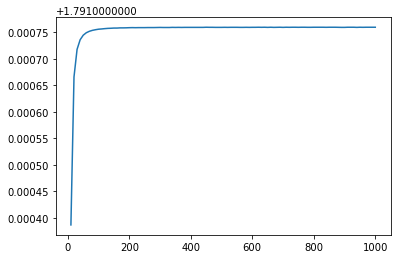

In [121]:
temps = np.linspace(1e-3, 1e3, 101)
entropies = [entropy(values, T=t) for t in temps]
plt.plot(temps, entropies)

In [119]:
entropy(extreme_values, T=10)

tensor(1.7847)

In [142]:
np.log(6)

1.791759469228055

In [205]:
def find_optimal_temp(values, desired_bits, temps_to_check = np.logspace(-3, 3, 1000)):
    if len(temps_to_check) == 1: return temps_to_check[0]
    mid_index = round(len(temps_to_check)/2)
    mid_ent1 = entropy(values, T=temps_to_check[mid_index-1])
    mid_ent2 = entropy(values, T=temps_to_check[mid_index])
    if np.isnan(mid_ent1):
        return find_optimal_temp(values, desired_bits, temps_to_check[mid_index:])
    if np.isnan(mid_ent2):
        return find_optimal_temp(values, desired_bits, temps_to_check[:mid_index])
    if mid_ent2 < desired_bits:
        return find_optimal_temp(values, desired_bits, temps_to_check[mid_index:])
    elif mid_ent1 > desired_bits:
        return find_optimal_temp(values, desired_bits, temps_to_check[:mid_index])
    else:
        return temps_to_check[mid_index-1]

In [211]:
find_optimal_temp(values, 0.001)

0.008412497049736118

In [214]:
entropy(values, 0.01)

tensor(0.0355)

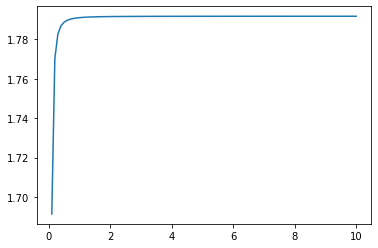

In [141]:
extreme_values = torch.as_tensor([0,0,0,0,0,0.1], dtype=torch.float32)
# max_range = max(extreme_values) - min(extreme_values)
temps = np.linspace(1e-3, 1e3, 101)
# temps = np.linspace(0.5, 2, 101)
entropies = [entropy(extreme_values, T=t) for t in temps]
plt.plot(temps, entropies)

In [74]:
math.log(6)

1.791759469228055

In [65]:
7.2240e-01

0.7224

In [54]:
manual_softmax(values+10)

tensor([0.2436, 0.2436, 0.2436, 0.2692])

In [49]:
F.softmax(values+10, dim=0)

tensor([0.2436, 0.2436, 0.2436, 0.2692])

In [41]:
entropy(values, 10)

tensor([0.1404, 0.1911, 0.1917, 0.1886, 0.1266, 0.1616])


tensor(1.7794)